<center><h1 style="background-color:navy; color:white">Amazon Sales</h1></center>

`Problem Statement`

In [45]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
import warnings

warnings.filterwarnings("ignore")
sns.set(color_codes=True)
%matplotlib inline

`Data Preprocessing`

In [46]:
# load data
df=pd.read_csv("C:/Users/tirum/Downloads/Amazon Sales data.csv")

In [47]:
df.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [48]:
df.shape

(100, 14)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [50]:
df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [51]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [52]:
# Check for duplicates
print("\nNumber of duplicated rows:")
print(df.duplicated().sum())


Number of duplicated rows:
0


In [53]:
# checking for any missing values
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

Observation: There is no missing values in this dataset.

In [54]:
# convert Order Date to date time format
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [55]:
# convert Ship Date to date time format
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

`Encode Categorical Variables`

In [56]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns if needed
label_encoder = LabelEncoder()

df['Region_Encoded'] = label_encoder.fit_transform(df['Region'])
df['Country_Encoded'] = label_encoder.fit_transform(df['Country'])

`Data Exploration`

Calculate and plot the correlation matrix

In [57]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

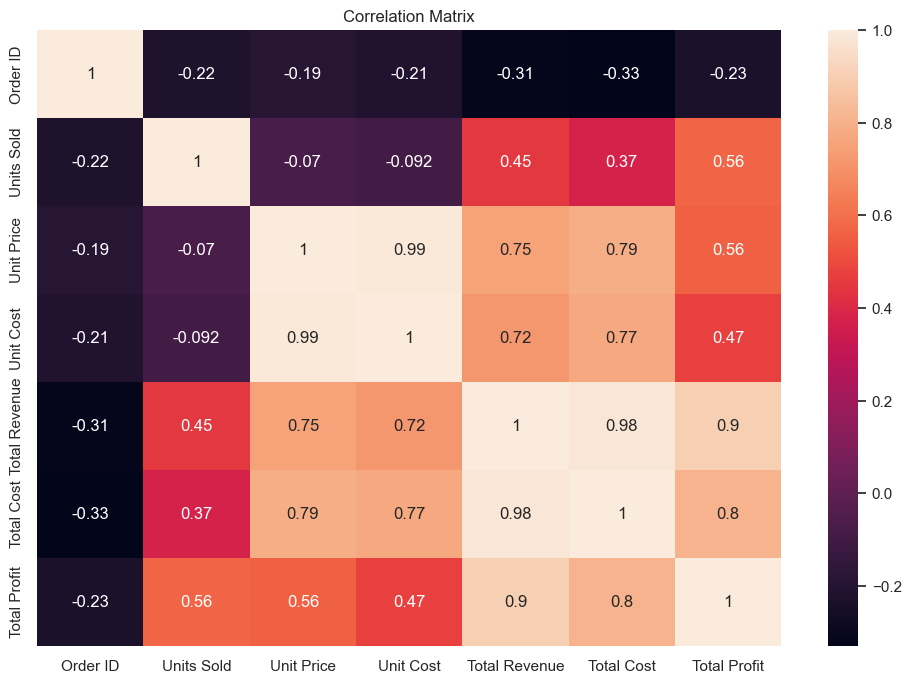

In [58]:

# Calculate correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

Count the occurrences of each Item Type

In [59]:
df['Item Type'].value_counts()

Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64

In [60]:
# Get summary statistics of the dataset
df.describe()

,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Region_Encoded,Country_Encoded
count,100,1.000000e+02,100,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000
mean,2013-09-16 14:09:36,5.550204e+08,2013-10-09 22:48:00,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05,3.620000,38.350000
min,2010-02-02 00:00:00,1.146066e+08,2010-02-25 00:00:00,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03,0.000000,0.000000
25%,2012-02-14 12:00:00,3.389225e+08,2012-02-24 18:00:00,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05,2.000000,17.750000
50%,2013-07-12 12:00:00,5.577086e+08,2013-08-11 12:00:00,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05,3.000000,39.500000
75%,2015-04-07 00:00:00,7.907551e+08,2015-04-28 00:00:00,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05,6.000000,59.000000
max,2017-05-22 00:00:00,9.940222e+08,2017-06-17 00:00:00,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06,6.000000,75.000000
std,NaN,2.606153e+08,NaN,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05,2.149841,22.733136


`Data Visualization`

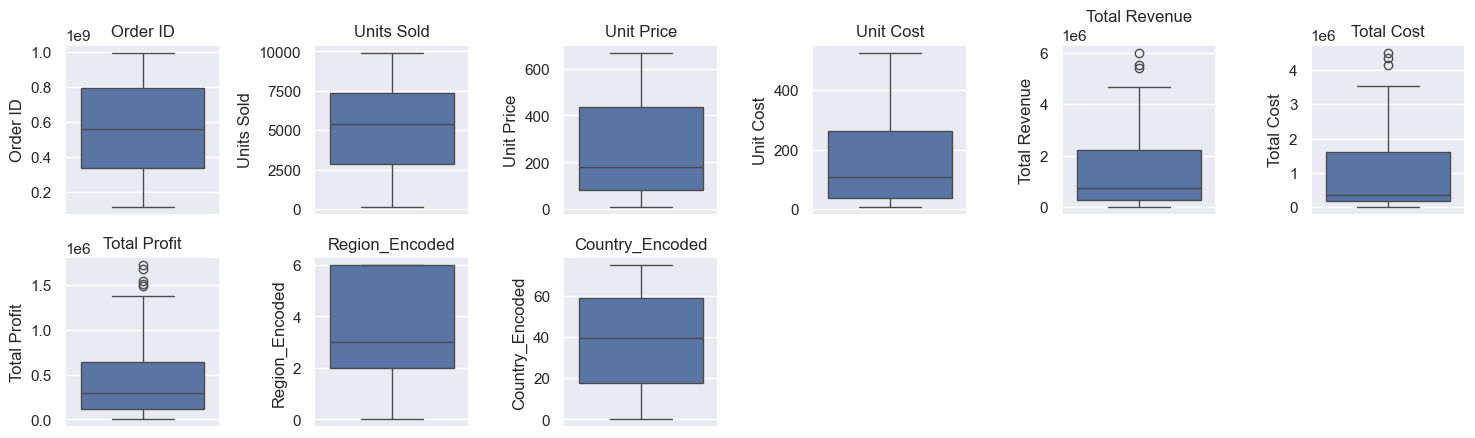

In [61]:
# Create a boxplot for the dataset
plt.figure(figsize=(15,15))
for i,var in enumerate(df.select_dtypes(include=['float','integer'])):
    plt.subplot(7,6,i+1)
    sns.boxplot(df.select_dtypes(include=['float','integer'])[var])
    plt.title(var)
plt.tight_layout()
plt.show()

`Extract Date Features`

In [62]:
# extracting year from order date
df['Year']=df['Order Date'].dt.year


In [63]:
# extracting month from order date
df['Month']=df['Order Date'].dt.month


In [64]:
# extracting year_Month from order date
df['Year_Month']=df['Order Date'].dt.to_period('M')

### Analysis Of Sales Trends 

Calculate and visualize sales trends by month, year, and year_month

<center><h4>Yearly Sales Analysis</h4></center>

In [65]:
# Year-wise sales trend
yearly_sales = df.groupby('Year').agg({
    'Total Revenue': 'sum',
    'Units Sold': 'sum',
    'Total Profit': 'sum'
}).reset_index()

# Display the yearly sales trend
print(yearly_sales)

   Year  Total Revenue  Units Sold  Total Profit
0  2010    19186024.92       61571    6629567.43
1  2011    11129166.07       54768    2741008.23
2  2012    31898644.52       97967    9213010.12
3  2013    20330448.66       64663    6715420.04
4  2014    16630214.43       92040    5879461.68
5  2015    12427982.86       49480    3996539.44
6  2016    12372867.22       43156    4903838.01
7  2017    13373419.63       49226    4089353.45


In [66]:
# Group by year and sum 'Total Revenue'
yearly_sales = df.groupby('Year')['Total Revenue'].sum().reset_index()


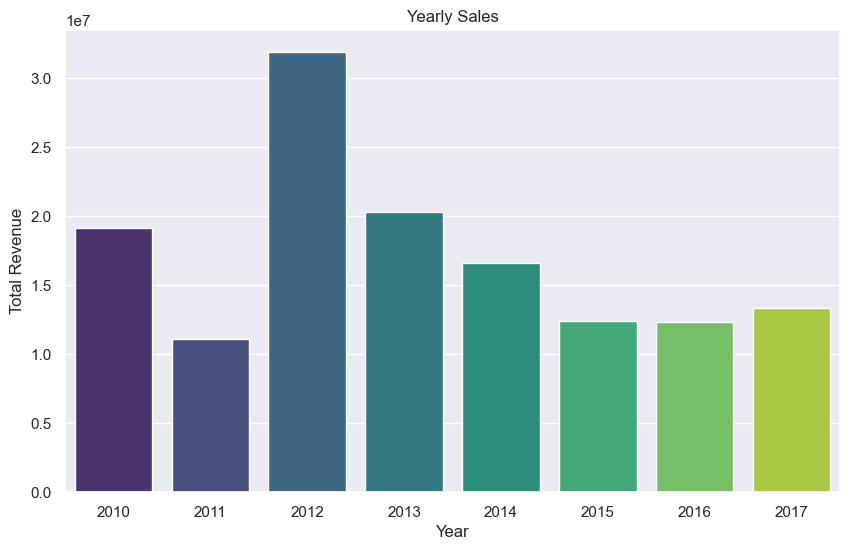

In [67]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Total Revenue', data=yearly_sales, palette='viridis')
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

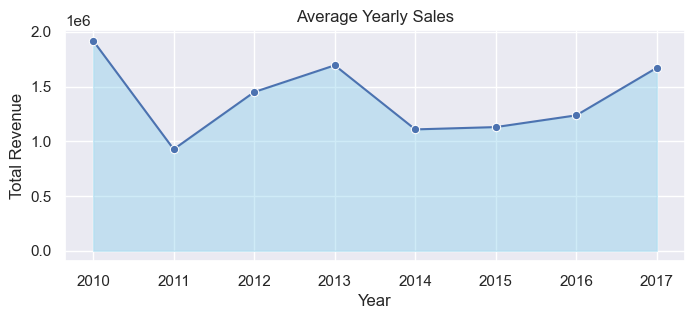

In [68]:
# Line chart for Average Yearly Sales

yr_sales_avg=df.groupby('Year')['Total Revenue'].mean().reset_index()
plt.figure(figsize=(8, 3))
sns.lineplot(x='Year', y='Total Revenue', data=yr_sales_avg, marker='o')
plt.fill_between(yr_sales_avg['Year'], yr_sales_avg['Total Revenue'], color='skyblue', alpha=0.4)

plt.title('Average Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

 yearly sales based on total profit and total revenue

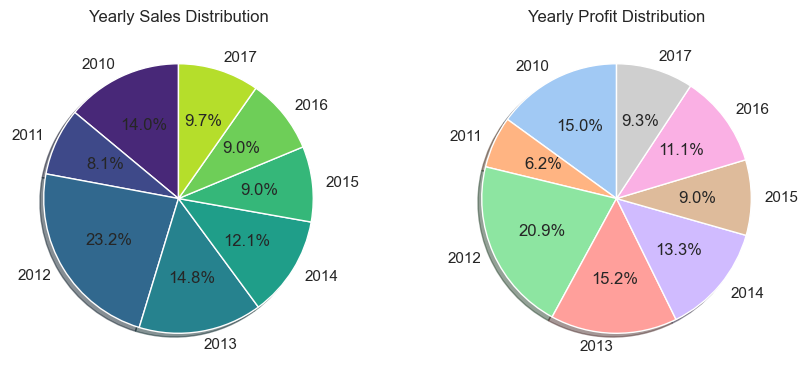

In [69]:

fig, axes = plt.subplots(1, 2,figsize=(10, 5), gridspec_kw={'wspace': 0.3})
# Calculate total yearly sales
yearly_sales = df.groupby('Year')['Total Revenue'].sum().reset_index()

# for yearly sales
axes[0].pie(yearly_sales['Total Revenue'], labels=yearly_sales['Year'], autopct='%1.1f%%', shadow=True, startangle=90, colors=sns.color_palette('viridis', len(yearly_sales)))
axes[0].set_title('Yearly Sales Distribution')


# Calculate total yearly profit
yearly_profit = df.groupby('Year')['Total Profit'].sum().reset_index()

# for yearly profit
axes[1].pie(yearly_profit['Total Profit'], labels=yearly_profit['Year'], autopct='%1.1f%%', shadow=True, startangle=90, colors=sns.color_palette('pastel', len(yearly_profit)))
axes[1].set_title('Yearly Profit Distribution')

plt.tight_layout()
plt.show()


<center><h4>Monthly Sales Analysis</h4></center>

In [70]:
# Month-wise sales trend
monthly_sales = df.groupby(['Year', 'Month']).agg({
    'Total Revenue': 'sum',
    'Units Sold': 'sum',
    'Total Profit': 'sum'
}).reset_index()

# Display the monthly sales trend
print(monthly_sales)

    Year  Month  Total Revenue  Units Sold  Total Profit
0   2010      2     3410661.12        9503    1424410.94
1   2010      5     2587973.26       15747     965441.52
2   2010      6     1082418.40        9905     727423.20
3   2010     10     6064933.75       14403    1495392.79
4   2010     11     3458252.00        7910    1375311.70
5   2010     12     2581786.39        4103     641587.28
6   2011      1     1042225.35       12914     363509.04
7   2011      2      387002.20        8156     127722.96
8   2011      4     2798046.49        4187     693911.51
9   2011      5      272410.45        5741      89904.06
10  2011      6       19103.44         124       7828.12
11  2011      7       97040.64         888      65214.72
12  2011      9      574951.92        3732     235601.16
13  2011     11     5938385.58       19026    1157316.66
14  2012      1     1012884.00        1548     206568.36
15  2012      2     6707849.42       15776    1553766.98
16  2012      3      994765.42 

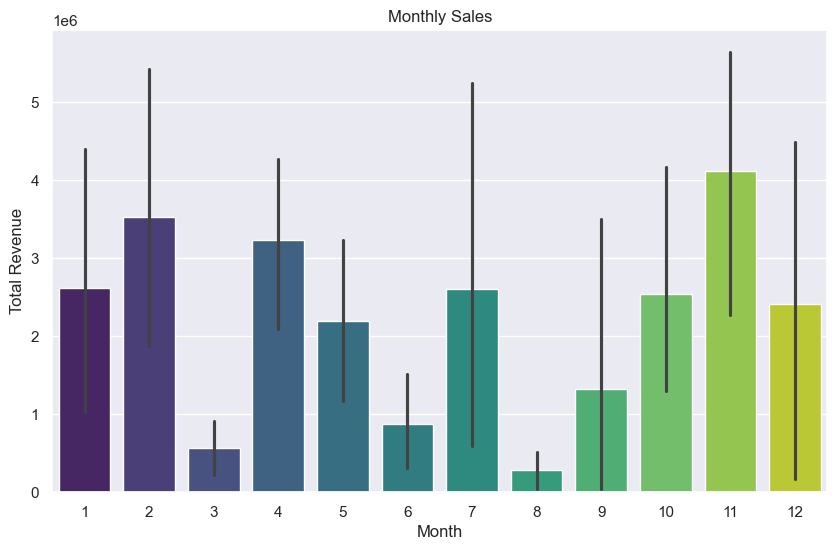

In [71]:

# Plot the monthly sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Total Revenue', data=monthly_sales, palette='viridis')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

Monthly sales based on total profit and total revenue

In [72]:
# Create a list of month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


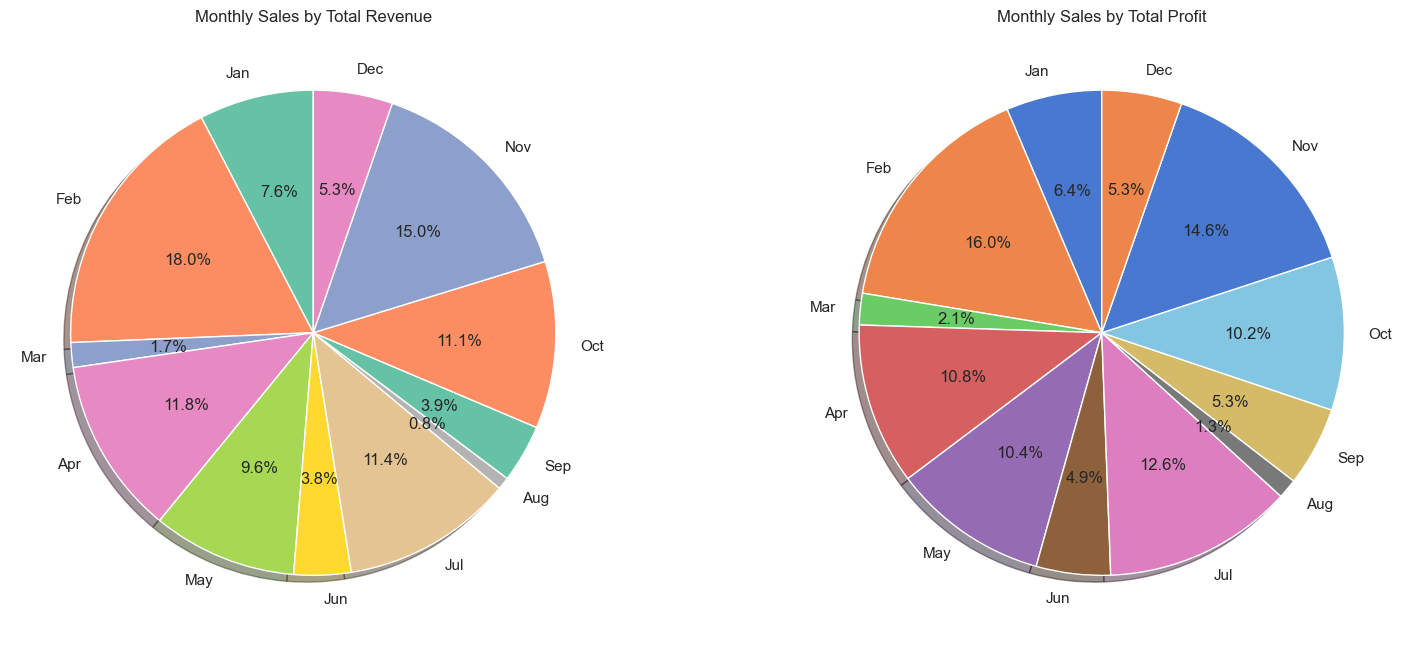

In [73]:

fig, axes = plt.subplots(1, 2,figsize=(18, 8), gridspec_kw={'wspace': 0.3})
# Calculate total Monthly sales
Monthly_sales = df.groupby('Month')['Total Revenue'].sum().reset_index()

# Plot pie chart for Monthly sales
axes[0].pie(Monthly_sales['Total Revenue'], labels=month_names, autopct='%1.1f%%', shadow=True, startangle=90, colors=sns.color_palette('Set2', len(Monthly_sales)))
axes[0].set_title('Monthly Sales by Total Revenue')


# Calculate total Monthly profit
Monthly_profit = df.groupby('Month')['Total Profit'].sum().reset_index()

# Plot pie chart for Monthly profit
axes[1].pie(Monthly_profit['Total Profit'], labels=month_names, autopct='%1.1f%%', shadow=True, startangle=90, colors=sns.color_palette('muted', len(Monthly_profit)))
axes[1].set_title('Monthly Sales by Total Profit')

plt.tight_layout()
plt.show()


In [74]:
# Aggregate total revenue and profit by Year_Month
monthly_summary = df.groupby('Year_Month')[['Total Revenue', 'Total Profit']].sum().reset_index()

# Convert Year_Month to a datetime for plotting
monthly_summary['Year_Month'] = monthly_summary['Year_Month'].dt.to_timestamp()


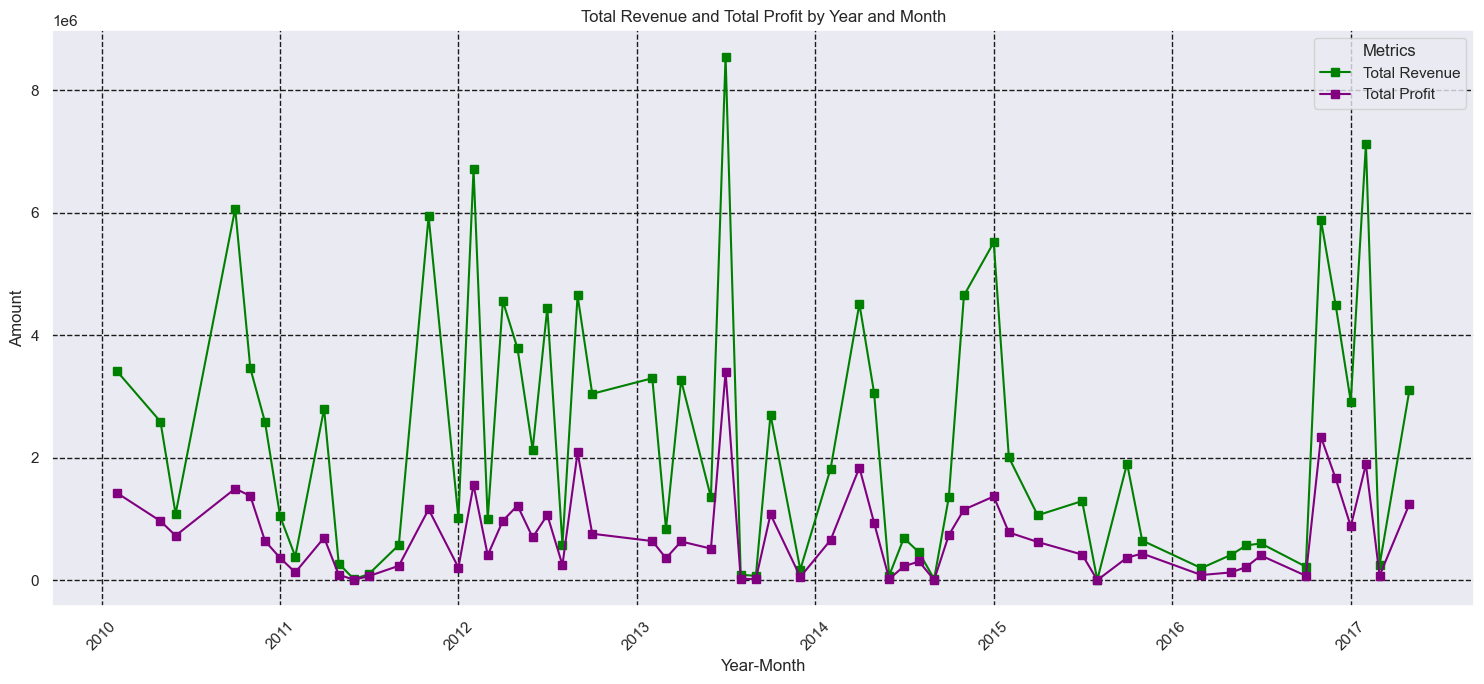

In [75]:

plt.figure(figsize=(15, 7))

# Total Revenue
plt.plot(monthly_summary['Year_Month'], monthly_summary['Total Revenue'], label='Total Revenue', color='green', marker='s')

# Total Profit
plt.plot(monthly_summary['Year_Month'], monthly_summary['Total Profit'], label='Total Profit', color='purple', marker='s')

plt.title('Total Revenue and Total Profit by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.grid(color='k',linestyle='--')
plt.tight_layout()

plt.show()

<center><h4>Analysis Of Sales Channel & Region</h4></center>

Profit and Revenue Analysis by Sales Channel
Calculate total profit and revenue by Sales Channel 

In [76]:
df.groupby(['Region','Sales Channel'])['Total Profit'].sum()

Region                             Sales Channel
Asia                               Offline          3584286.33
                                   Online           2529559.54
Australia and Oceania              Offline          1886283.82
                                   Online           2835876.21
Central America and the Caribbean  Offline          2475814.99
                                   Online            371092.86
Europe                             Offline          5574539.91
                                   Online           5508398.72
Middle East and North Africa       Offline          2169081.08
                                   Online           3592110.78
North America                      Offline          1457942.76
Sub-Saharan Africa                 Offline          7772777.78
                                   Online           4410433.62
Name: Total Profit, dtype: float64

In [77]:
df.groupby(['Region','Sales Channel'])['Total Revenue'].sum()

Region                             Sales Channel
Asia                               Offline          12146097.76
                                   Online            9200993.26
Australia and Oceania              Offline           4201867.85
                                   Online            9892397.28
Central America and the Caribbean  Offline           8254112.19
                                   Online             916273.30
Europe                             Offline          18122486.45
                                   Online           15246445.66
Middle East and North Africa       Offline           4993138.88
                                   Online            9059567.70
North America                      Offline           5643356.55
Sub-Saharan Africa                 Offline          25733749.52
                                   Online           13938281.91
Name: Total Revenue, dtype: float64

### Group the data by Sales Channel and sum the Total Revenue and Total Profit for each channel


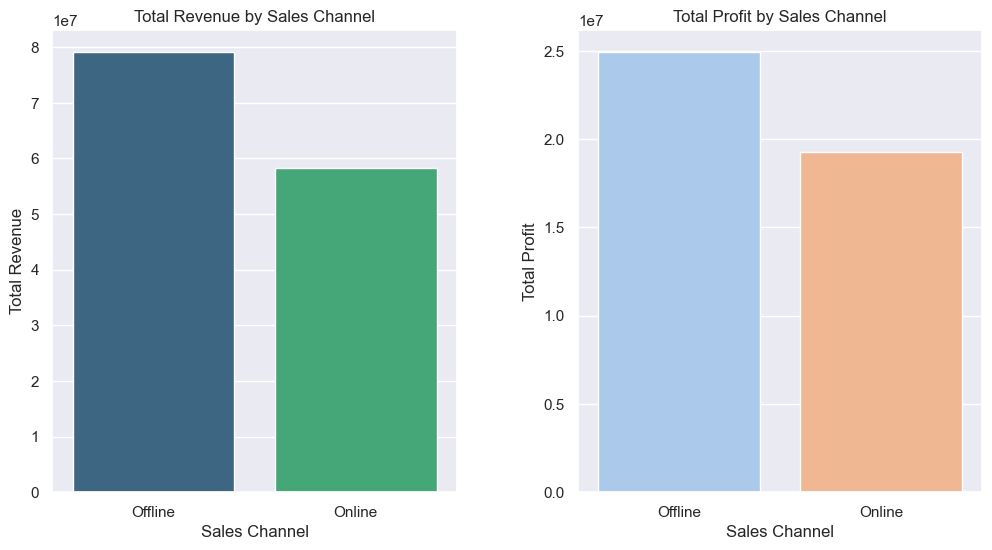

In [78]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'wspace': 0.3})

# bar chart for Total Revenue
rev_by_channel = df.groupby('Sales Channel')['Total Revenue'].sum().reset_index()

sns.barplot(ax=axes[0], x='Sales Channel', y='Total Revenue', data=rev_by_channel, palette='viridis')
axes[0].set_title('Total Revenue by Sales Channel')
axes[0].set_xlabel('Sales Channel')
axes[0].set_ylabel('Total Revenue')

# bar chart for Total Profit
pf_by_channel = df.groupby('Sales Channel')['Total Profit'].sum().reset_index()

sns.barplot(ax=axes[1], x='Sales Channel', y='Total Profit', data=pf_by_channel, palette='pastel')
axes[1].set_title('Total Profit by Sales Channel')
axes[1].set_xlabel('Sales Channel')
axes[1].set_ylabel('Total Profit')

plt.tight_layout()
plt.show()

In [79]:

#Combine all revenues and profits for each region.

rev_by_region = df.groupby('Region')['Total Revenue'].sum().reset_index()
pf_by_region = df.groupby('Region')['Total Profit'].sum().reset_index()


In [80]:
combined_df = pd.merge(rev_by_region, pf_by_region, on='Region', suffixes=('_Revenue', '_Profit'))
# Melt the DataFrame for seaborn's lineplot
melted_df = combined_df.melt(id_vars='Region', value_vars=['Total Revenue', 'Total Profit'],
                             var_name='Metric', value_name='Value')


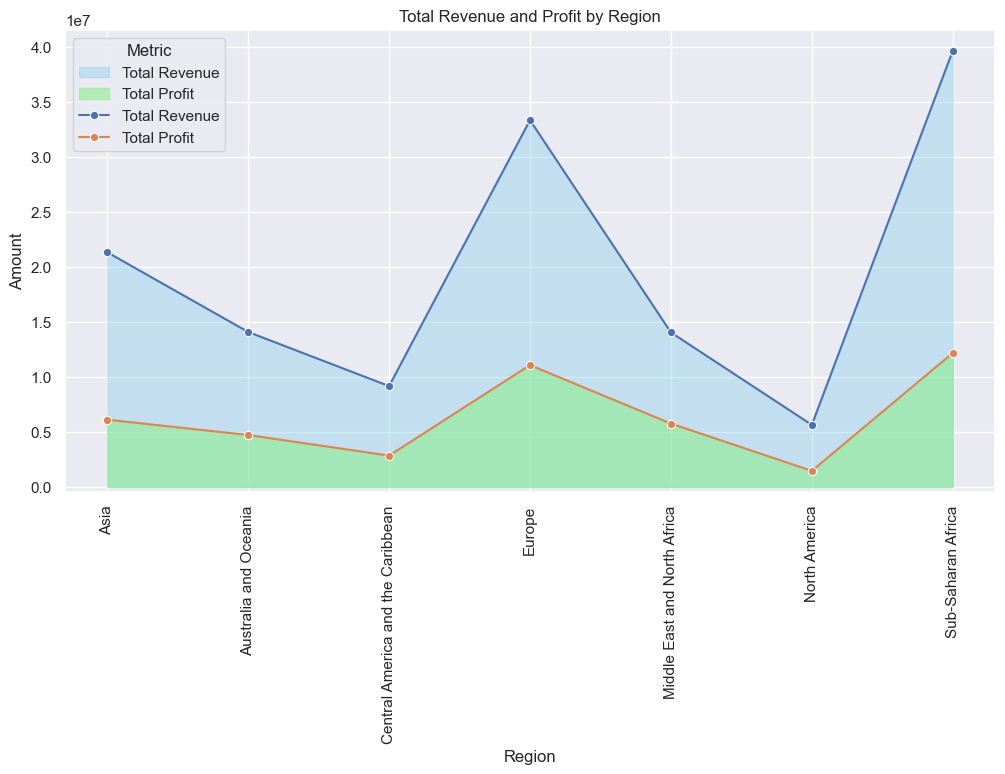

In [81]:
plt.figure(figsize=(12, 6))
plt.fill_between(combined_df.index, combined_df['Total Revenue'], color='skyblue', alpha=0.4, label='Total Revenue')
plt.fill_between(combined_df.index, combined_df['Total Profit'], color='lightgreen', alpha=0.6, label='Total Profit')

sns.lineplot(data=melted_df, x='Region', y='Value', hue='Metric', marker='o')

plt.title('Total Revenue and Profit by Region')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend(title='Metric')
plt.show()

total revenue, total profit, and units sold by region

In [82]:
# Aggregate data
agg_data = df.groupby('Region').agg({
    'Total Revenue': 'sum',
    'Total Profit': 'sum',
    'Units Sold': 'sum'
}).reset_index()

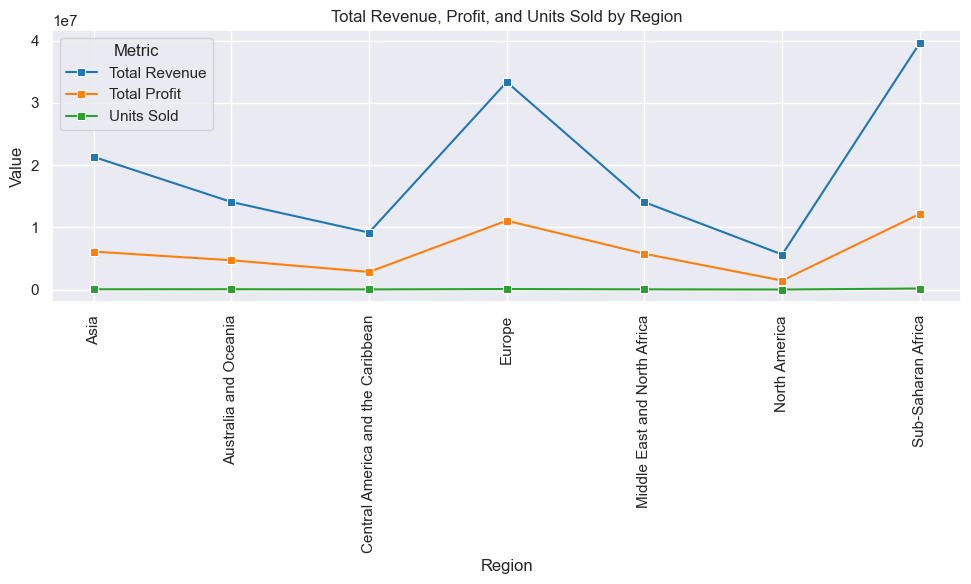

In [83]:
# Melt the DataFrame for better plotting
melted_data = agg_data.melt(id_vars='Region', value_vars=['Total Revenue', 'Total Profit', 'Units Sold'],
                            var_name='Metric', value_name='Value')

plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_data, x='Region', y='Value', hue='Metric', marker='s', palette='tab10')

plt.title('Total Revenue, Profit, and Units Sold by Region')
plt.xlabel('Region')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

total profit by item type

In [84]:

profit_by_item_type = df.groupby('Item Type')['Total Profit'].sum().reset_index()
print(profit_by_item_type )

          Item Type  Total Profit
0         Baby Food    3886643.70
1         Beverages     888047.28
2            Cereal    2292443.43
3           Clothes    5233334.40
4         Cosmetics   14556048.66
5            Fruits     120495.18
6         Household    7412605.71
7              Meat     610610.00
8   Office Supplies    5929583.75
9     Personal Care    1220622.48
10           Snacks     751944.18
11       Vegetables    1265819.63


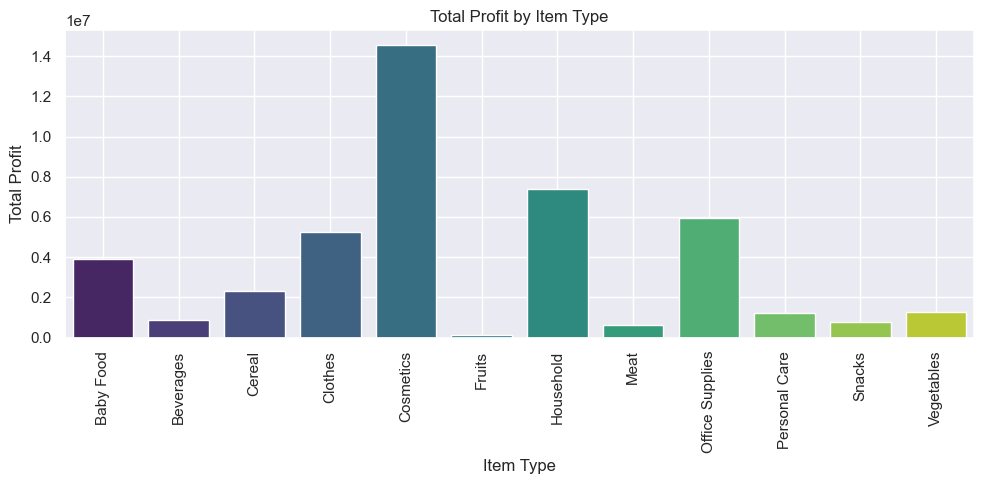

In [85]:
# profit by item type
plt.figure(figsize=(10, 5))
sns.barplot(x='Item Type', y='Total Profit', data=profit_by_item_type, palette='viridis')
plt.title('Total Profit by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

Compute the average unit price for each item type

In [86]:

avg_unit_price = df.groupby('Item Type')['Unit Price'].mean().reset_index()
print(avg_unit_price)

          Item Type  Unit Price
0         Baby Food      255.28
1         Beverages       47.45
2            Cereal      205.70
3           Clothes      109.28
4         Cosmetics      437.20
5            Fruits        9.33
6         Household      668.27
7              Meat      421.89
8   Office Supplies      651.21
9     Personal Care       81.73
10           Snacks      152.58
11       Vegetables      154.06


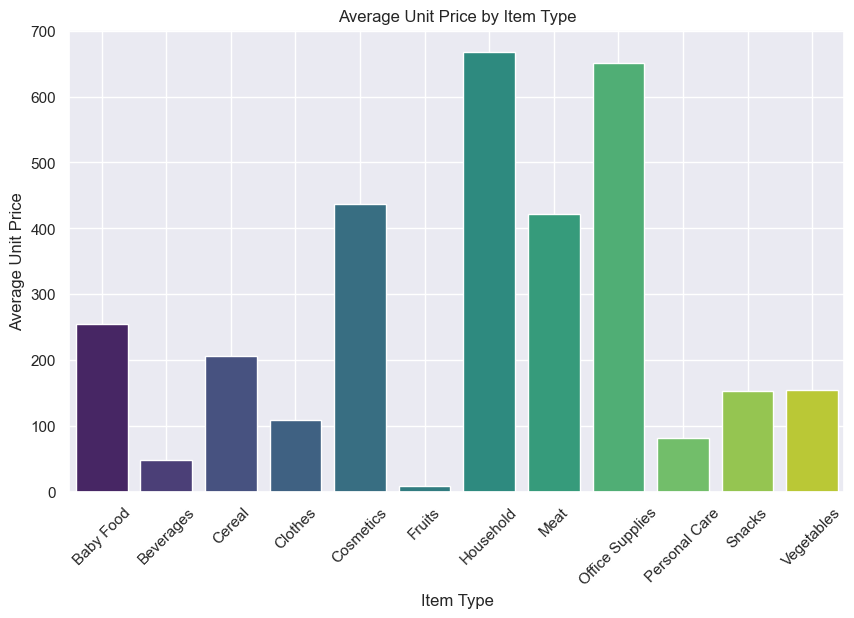

In [87]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Type', y='Unit Price', data=avg_unit_price, palette='viridis')
plt.title('Average Unit Price by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Average Unit Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<center><h4>Country Analysis</h4></center>

In [88]:
# Aggregate total revenue by country
country_revenue = df.groupby('Country')['Total Revenue'].sum().reset_index()
# Sort the data by Total Revenue in descending order
country_revenue = country_revenue.sort_values(by='Total Revenue', ascending=False)


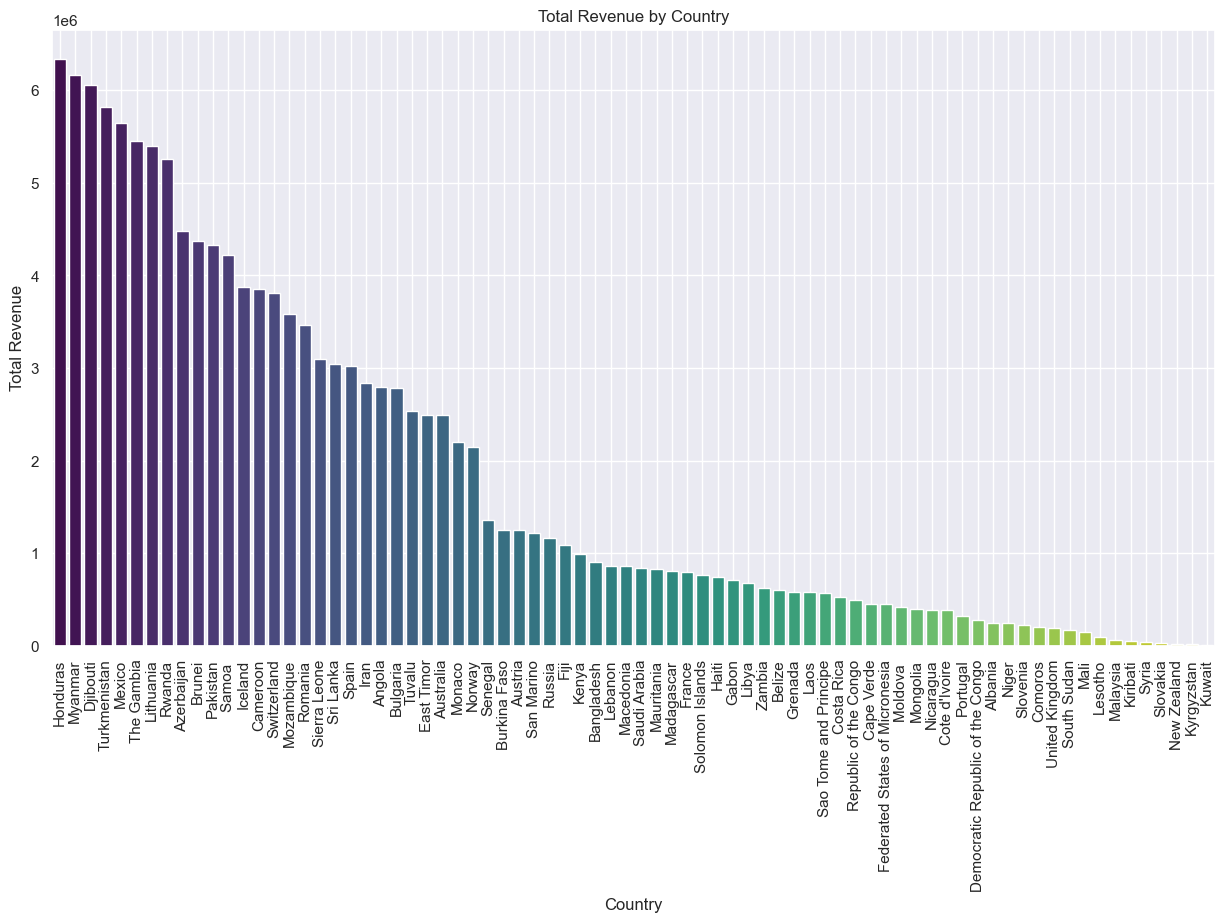

In [89]:
# total revenue by country
plt.figure(figsize=(15, 8))
sns.barplot(x='Country', y='Total Revenue', data=country_revenue, palette='viridis')
plt.title('Total Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

### Calculate Profit Margin

In [91]:
# create profit margin column
df['Profit Margin'] = df['Total Profit'] / df['Total Revenue']
print(df[['Region', 'Item Type', 'Profit Margin']].groupby(['Region', 'Item Type']).mean())


                                                   Profit Margin
Region                            Item Type                     
Asia                              Clothes               0.672035
                                  Cosmetics             0.397690
                                  Fruits                0.258307
                                  Household             0.247999
                                  Office Supplies       0.193870
                                  Personal Care         0.306619
                                  Vegetables            0.409775
Australia and Oceania             Baby Food             0.375509
                                  Beverages             0.330032
                                  Cereal                0.430676
                                  Clothes               0.672035
                                  Cosmetics             0.397690
                                  Fruits                0.258307
                         

In [95]:
# Calculate profit margin by region
profit_margin_by_region = df.groupby('Region').apply(
    lambda x: (x['Total Profit'].sum() / x['Total Revenue'].sum()) * 100
).reset_index(name='Profit Margin')

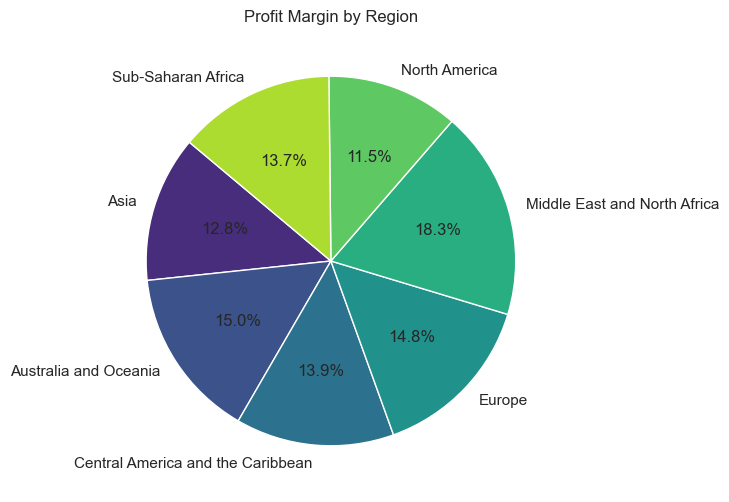

In [96]:
plt.figure(figsize=(10, 6))
plt.pie(profit_margin_by_region['Profit Margin'], labels=profit_margin_by_region['Region'],
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(profit_margin_by_region)))
plt.title('Profit Margin by Region')
plt.show()


In [94]:
# Calculate profit margin by country
profit_margin_by_country = df.groupby('Country').apply(
    lambda x: (x['Total Profit'].sum() / x['Total Revenue'].sum()) * 100
).reset_index(name='Profit Margin')


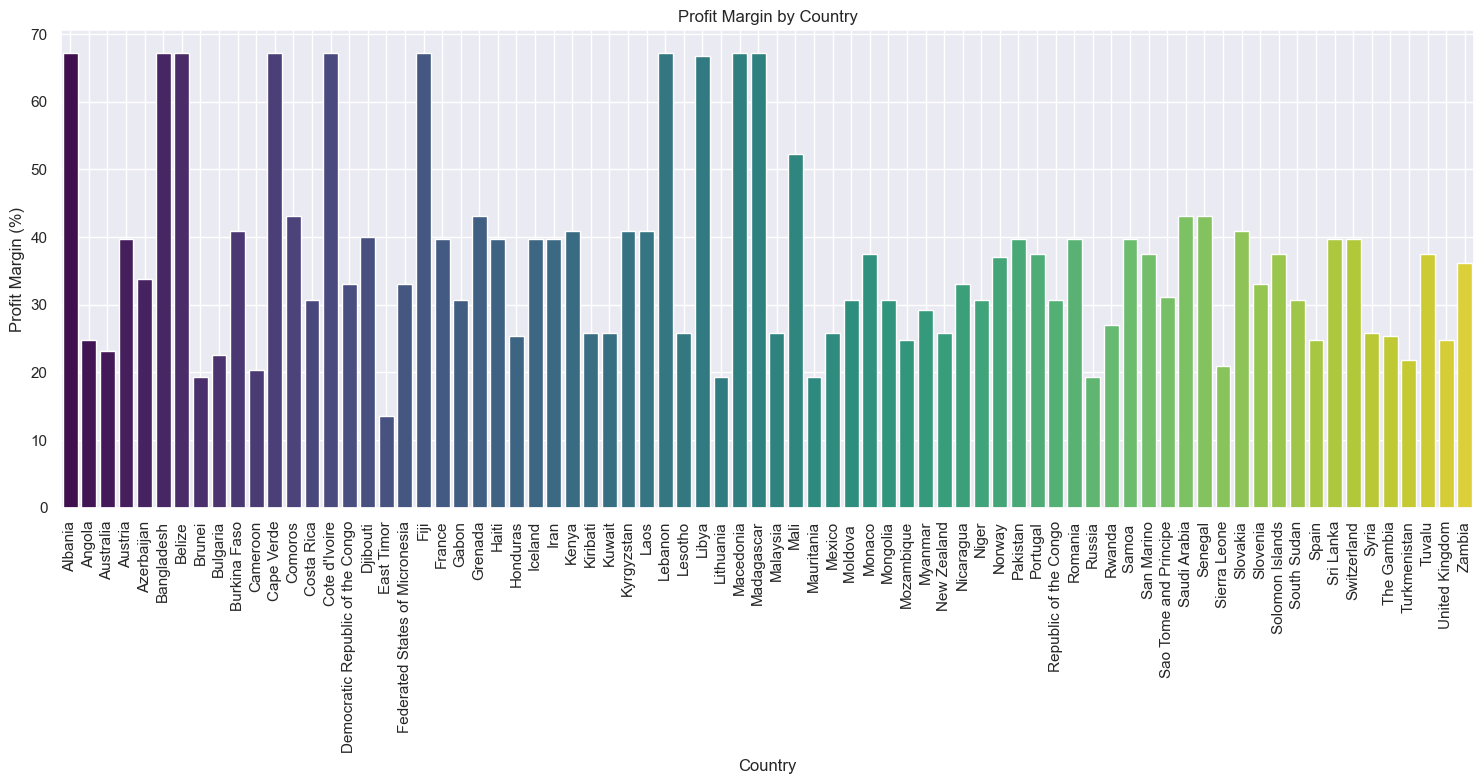

In [97]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Country', y='Profit Margin', data=profit_margin_by_country, palette='viridis')
plt.title('Profit Margin by Country')
plt.xlabel('Country')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


In [98]:
# Calculate profit margin by item type
profit_margin_by_item_type = df.groupby('Item Type').apply(
    lambda x: (x['Total Profit'].sum() / x['Total Revenue'].sum()) * 100
).reset_index(name='Profit Margin')

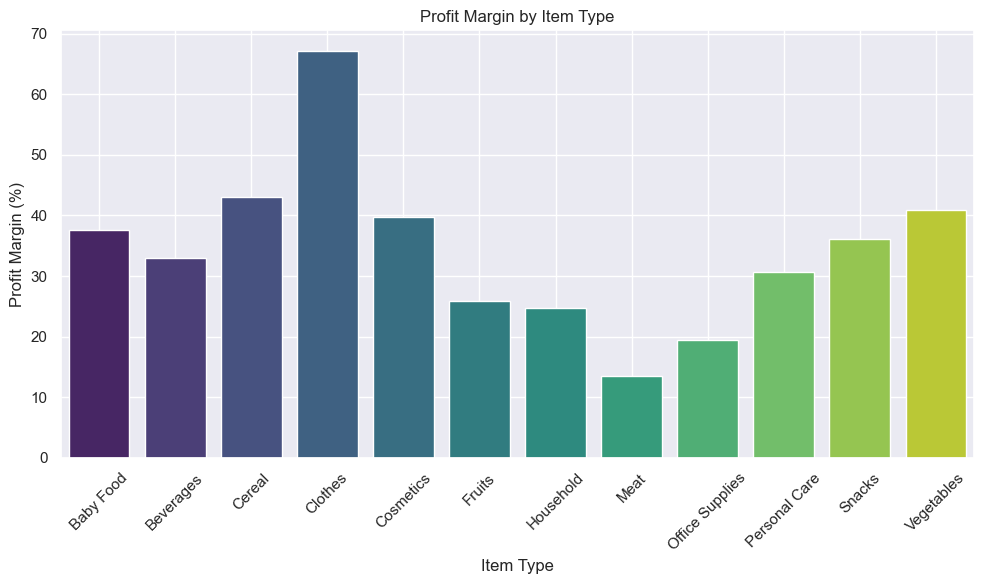

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Type', y='Profit Margin', data=profit_margin_by_item_type, palette='viridis')
plt.title('Profit Margin by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<center><h4>Net Profit Analysis</h4></center>

In [100]:
# Calculate Net Profit
df['Net Profit'] = df['Total Revenue'] - df['Total Profit']
df['Net Profit']

0     1582243.50
1      328376.44
2      933903.84
3       56065.84
4     2657347.52
         ...    
95      31825.92
96      43367.64
97     135031.05
98     326815.89
99    2697132.18
Name: Net Profit, Length: 100, dtype: float64

In [101]:
yearly_net_profit = df.groupby(df['Order Date'].dt.year)['Net Profit'].sum().reset_index()
yearly_net_profit.columns = ['Year', 'Net Profit']

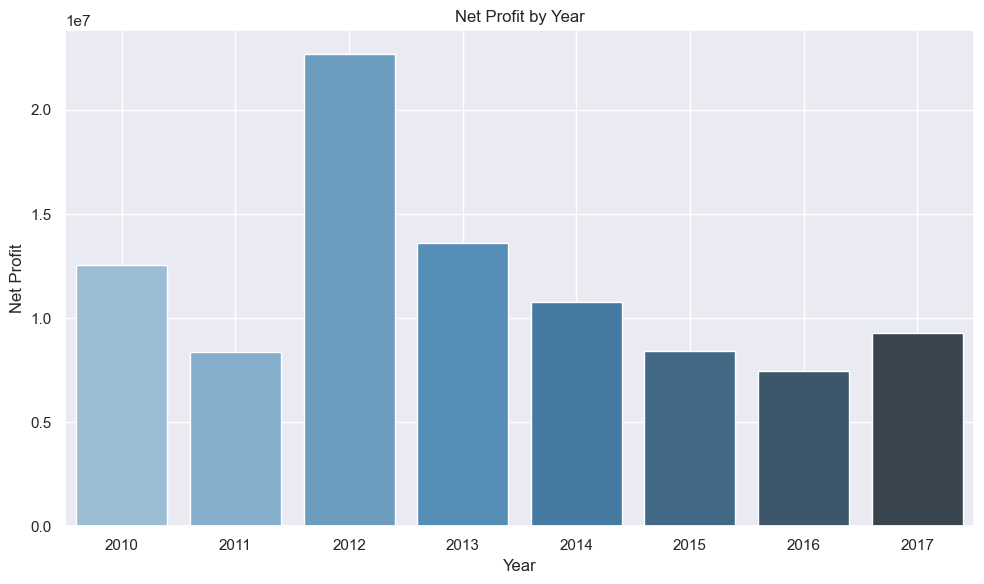

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Net Profit', data=yearly_net_profit, palette='Blues_d')
plt.title('Net Profit by Year')
plt.xlabel('Year')
plt.ylabel('Net Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

In [103]:
# Aggregate total net profit by month
monthly_net_profit = df.groupby(df['Order Date'].dt.month)['Net Profit'].sum().reset_index()
monthly_net_profit.columns = ['Month', 'Net Profit']

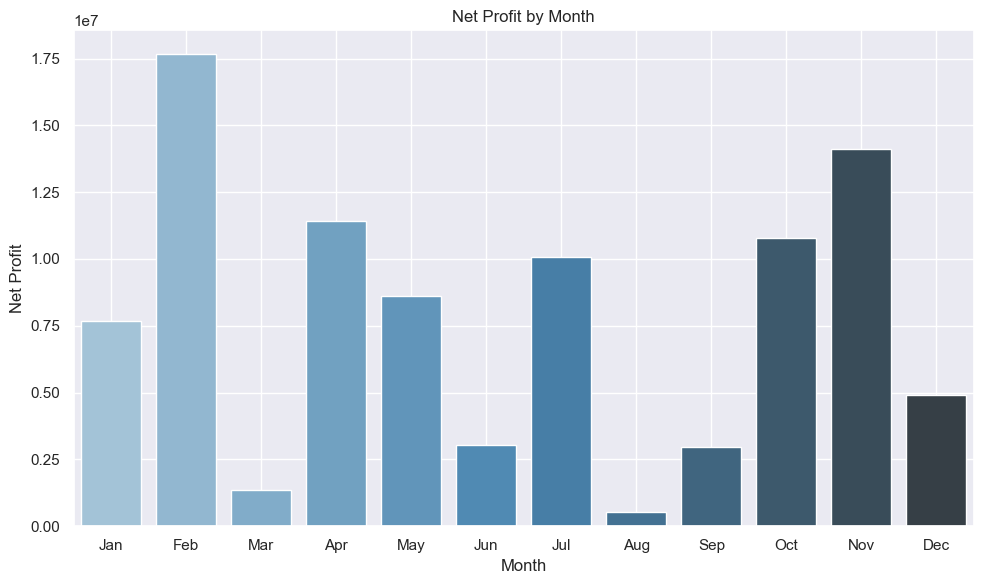

In [104]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Net Profit', data=monthly_net_profit, palette='Blues_d')
plt.title('Net Profit by Month')
plt.xlabel('Month')
plt.ylabel('Net Profit')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [106]:
# Aggregate total net profit by Year_Month
ym_net_profit = df.groupby('Year_Month')['Net Profit'].sum().reset_index()



In [107]:
# Convert Year_Month to a datetime for plotting
ym_net_profit['Year_Month'] = ym_net_profit['Year_Month'].dt.to_timestamp()


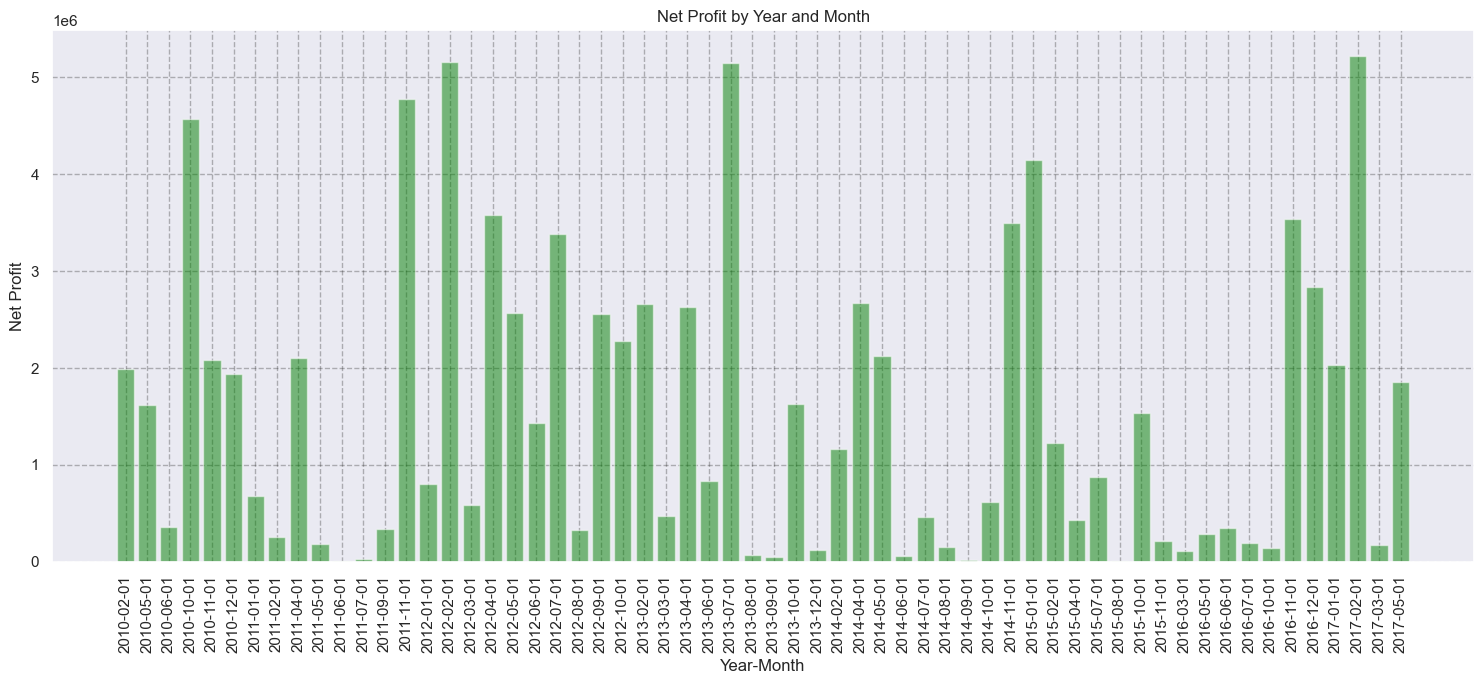

In [108]:
plt.figure(figsize=(15, 7))
plt.bar(ym_net_profit['Year_Month'].astype(str),  # Convert Year_Month to string for better x-axis labels
        ym_net_profit['Net Profit'], 
        color='green', 
        alpha=0.5, 
        label='Net Profit')

plt.title('Net Profit by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(color='k', linestyle='--', alpha=0.3)  # Slightly transparent grid lines
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [109]:
# Visualization for total revenue, total profit and net profit by region
region_wise = df.groupby('Region')[['Total Revenue', 'Total Profit', 'Net Profit']].sum().reset_index()
print(region_wise)

                              Region  Total Revenue  Total Profit   Net Profit
0                               Asia    21347091.02    6113845.87  15233245.15
1              Australia and Oceania    14094265.13    4722160.03   9372105.10
2  Central America and the Caribbean     9170385.49    2846907.85   6323477.64
3                             Europe    33368932.11   11082938.63  22285993.48
4       Middle East and North Africa    14052706.58    5761191.86   8291514.72
5                      North America     5643356.55    1457942.76   4185413.79
6                 Sub-Saharan Africa    39672031.43   12183211.40  27488820.03


In [110]:

# Melt the DataFrame for plotting
melted_region_wise = region_wise.melt(id_vars='Region', 
                                            value_vars=['Total Revenue', 'Total Profit', 'Net Profit'],
                                            var_name='Metric', 
                                            value_name='Value')

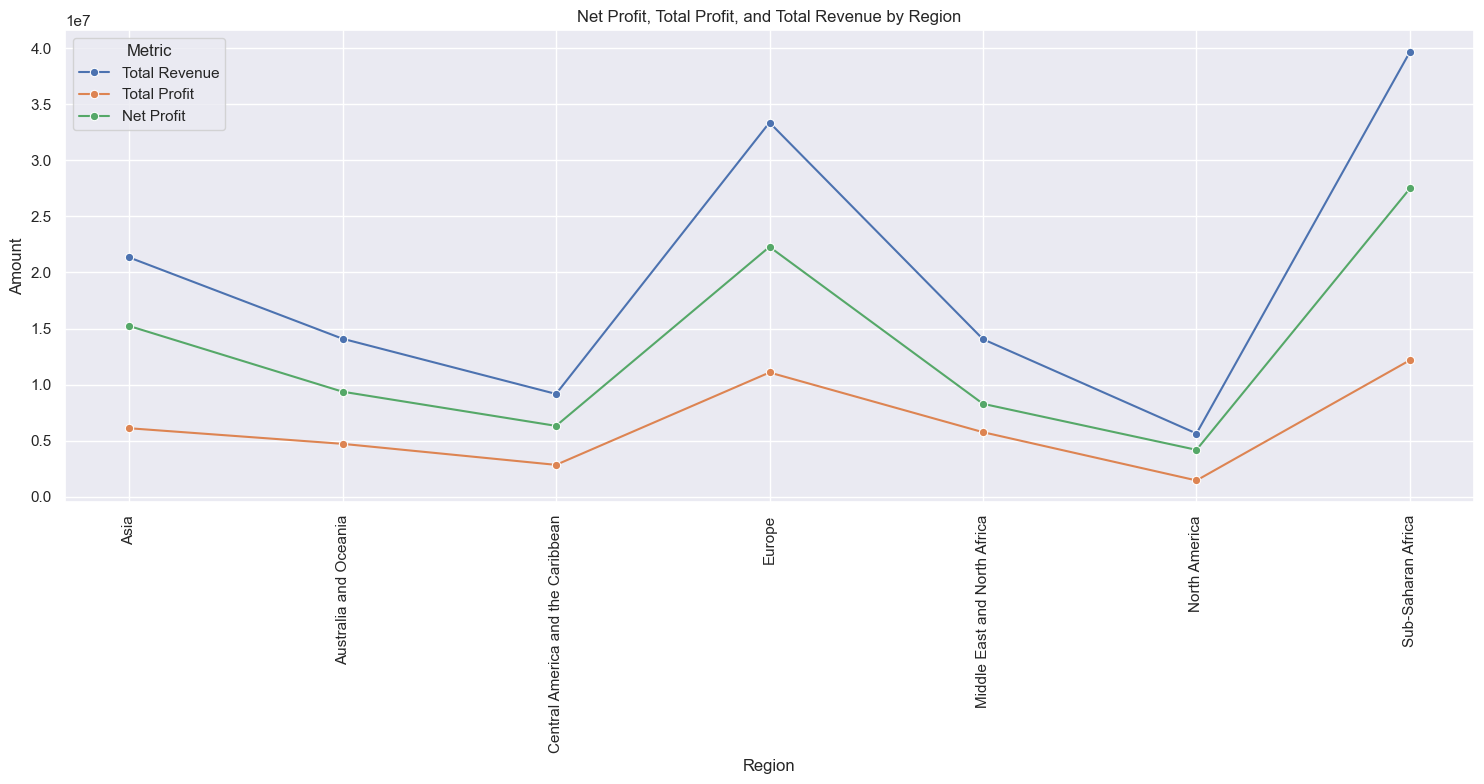

In [111]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=melted_region_wise, x='Region', y='Value', hue='Metric', marker='o')

plt.title('Net Profit, Total Profit, and Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.xticks(rotation=90)  
plt.grid(True)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

Determine which product type has the highest profit

In [112]:
profit_by_product = df.groupby('Item Type')['Total Profit'].sum().reset_index()


In [113]:
# Sort the results to find the product with the highest profit
profit_by_product = profit_by_product.sort_values(by='Total Profit', ascending=False)

# Display the results
print(profit_by_product)

          Item Type  Total Profit
4         Cosmetics   14556048.66
6         Household    7412605.71
8   Office Supplies    5929583.75
3           Clothes    5233334.40
0         Baby Food    3886643.70
2            Cereal    2292443.43
11       Vegetables    1265819.63
9     Personal Care    1220622.48
1         Beverages     888047.28
10           Snacks     751944.18
7              Meat     610610.00
5            Fruits     120495.18


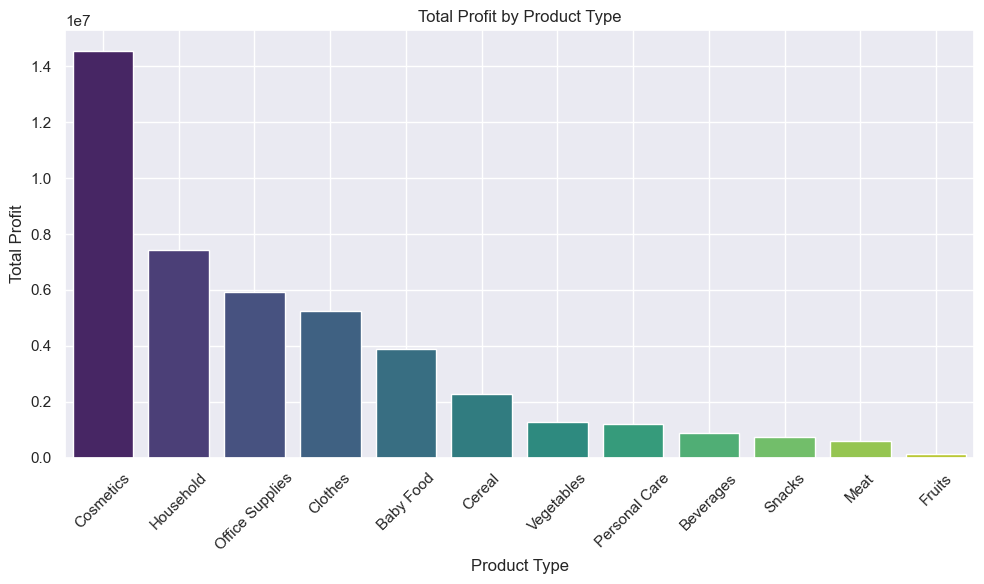

In [114]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Type', y='Total Profit', data=profit_by_product, palette='viridis')
plt.title('Total Profit by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Describe total revenue, total profit, and total cost

In [115]:
# Analyze key metrics like total revenue, total cost, and total profit
key_metrics = df[['Total Revenue', 'Total Cost', 'Total Profit']].describe()
print(key_metrics)


       Total Revenue    Total Cost  Total Profit
count   1.000000e+02  1.000000e+02  1.000000e+02
mean    1.373488e+06  9.318057e+05  4.416820e+05
std     1.460029e+06  1.083938e+06  4.385379e+05
min     4.870260e+03  3.612240e+03  1.258020e+03
25%     2.687212e+05  1.688680e+05  1.214436e+05
50%     7.523144e+05  3.635664e+05  2.907680e+05
75%     2.212045e+06  1.613870e+06  6.358288e+05
max     5.997055e+06  4.509794e+06  1.719922e+06


`LinearRegression Model For predicting Total Profit`

In [116]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [117]:
label_encoder = LabelEncoder()
df['Sales Channel_Encoded'] = label_encoder.fit_transform(df['Sales Channel'])
df['Order Priority_Encoded'] = label_encoder.fit_transform(df['Order Priority'])
df['Item Type_Encoded'] = label_encoder.fit_transform(df['Item Type'])

In [118]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit',
       'Region_Encoded', 'Country_Encoded', 'Year', 'Month', 'Year_Month',
       'Profit Margin', 'Net Profit', 'Sales Channel_Encoded',
       'Order Priority_Encoded', 'Item Type_Encoded'],
      dtype='object')

In [119]:
# Features and target variable
features_profit = df[['Units Sold', 'Unit Price', 'Unit Cost', 'Region_Encoded', 'Item Type_Encoded', 'Sales Channel_Encoded', 'Order Priority_Encoded', 'Total Cost', 'Year', 'Month']]
target_profit = df['Total Profit']

In [120]:
# Standardize features
scaler = StandardScaler()
features_profit_scaled = scaler.fit_transform(features_profit)

In [121]:
# Split data into training and testing sets
X_train_profit, X_test_profit, y_train_profit, y_test_profit = train_test_split(features_profit_scaled, target_profit, test_size=0.2, random_state=42)


In [122]:
# Initialize and train the model
model_profit = LinearRegression()
model_profit.fit(X_train_profit, y_train_profit)

LinearRegression()

In [123]:
# Perform cross-validation
cv_scores = cross_val_score(model_profit, features_profit_scaled, target_profit, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {cv_scores.mean():.2f}")

Cross-Validation R² Scores: [0.96832873 0.93762818 0.943112   0.91170395 0.94307596]
Mean Cross-Validation R² Score: 0.94


In [125]:
# Predict on the test set
y_pred_profit = model_profit.predict(X_test_profit)
y_pred_profit


array([ 218599.313207  ,  379195.06041805,  683238.22102528,
        120030.16071829,  462289.50989529,  483797.81839201,
        124189.2920586 ,  789087.13494259,   31443.73173186,
        878907.98996304,  682911.71749131, 1339278.30964676,
        725491.26355865, 1413349.84108919,  -73364.90817057,
        633467.51038116,  293668.29343918,  246303.55635563,
        558825.96288049,  -58340.56386819])

In [126]:
y_test_profit

83     225246.90
53     436446.25
70     632512.50
45      85223.58
44     435499.20
39     503358.75
22     122686.50
80     747939.49
10       7828.12
0      951410.50
18     634745.90
30    1505888.07
73     766835.04
33    1367272.50
90     119685.00
4      639077.50
76     146875.14
77     235601.16
12     606834.72
31      53252.50
Name: Total Profit, dtype: float64

In [127]:

mae = mean_absolute_error(y_test_profit, y_pred_profit)
mse = mean_squared_error(y_test_profit, y_pred_profit)
r2 = r2_score(y_test_profit, y_pred_profit)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 57625.24
Mean Squared Error: 6167404257.93
R² Score: 0.96


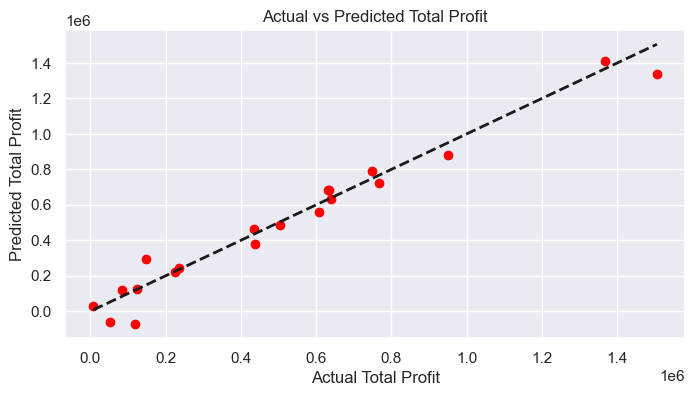

In [128]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test_profit, y_pred_profit, color='red')
plt.xlabel("Actual Total Profit")
plt.ylabel("Predicted Total Profit")
plt.title("Actual vs Predicted Total Profit")
plt.grid(True)

plt.plot([y_test_profit.min(), y_test_profit.max()], [y_test_profit.min(), y_test_profit.max()], 'k--', lw=2)

plt.show()


`Logistic Regression Model`

Use a logistic regression model to predict whether 'Total Profit' is above the median based on the features 'Unit Price', 'Unit Cost', and 'Order Priority_Encoded'.

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
df['Order Priority_Encoded'] = LabelEncoder().fit_transform(df['Order Priority'])


In [131]:
# Create binary target variable for high profit
median_profit = df['Total Profit'].median()
df['High_Profit'] = (df['Total Profit'] > median_profit).astype(int)

In [132]:
# Define features and target variable
features = df[['Unit Price', 'Unit Cost', 'Order Priority_Encoded']]
target = df['High_Profit']

In [133]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [134]:
# Initialize and train the model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [135]:
# Predict on the test set
y_pred = model_lr.predict(X_test)

In [136]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


In [137]:
target_names = ['Low_Profit', 'High_Profit']
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

  Low_Profit       1.00      0.75      0.86         8
 High_Profit       0.86      1.00      0.92        12

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20



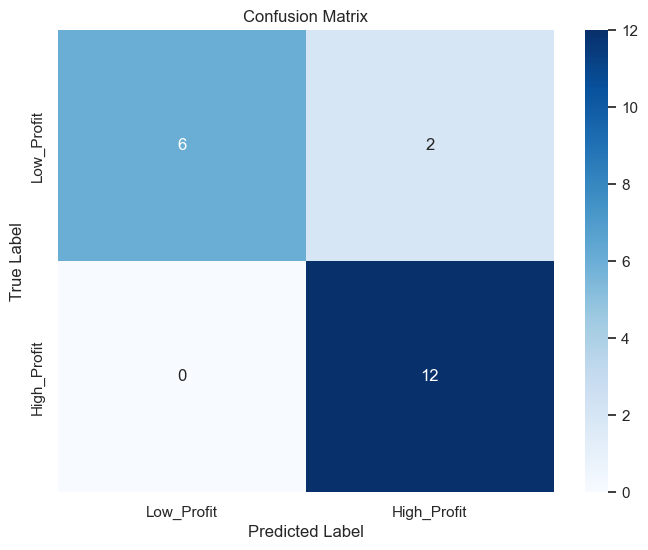

In [138]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [139]:
# Correlation analysis
correlation = df[['Sales Channel_Encoded', 'Total Profit']].corr()
print("Correlation with Total Profit:\n", correlation['Total Profit'])


Correlation with Total Profit:
 Sales Channel_Encoded   -0.130019
Total Profit             1.000000
Name: Total Profit, dtype: float64
